# R Squared
## 为什么不使用前面的标准？
前面介绍的**MAE**、**MSE**、**RMSE**算出来都是一个数值，用于大致估算由回归方程算出的值。

对于两种不同数据，如用使用同一种线性回归方法，用RMSE标准，预测房价的误差RMSE结果为5万元，预测成绩的差距RMSE为10分，我们只能用实际的感觉来估算这个误差大不大，不能用数据化的指标来判断线性回归算法是否足够好。

而kNN算法的衡量标准，是使用分类精确度来评判，值越接近1，表示分类效果越好；越接近0，表示分类效果越差。  

我们想让衡量线性回归算法的标准也具有上述性质，所以使用R Squared衡量标准。

## R Squared的定义

**公式:**  $$R^{2}=1-\frac{S S_{\text {residual}}}{S S_{\text {total}}}$$

其中：  
$S S_{\text {residual}}$ = Residual Sum of Squares  
$S S_{\text {total}}$ = Total Sum of Squares  
$$R^{2}=1-\frac{\sum_{i}\left(\hat{y}^{(i)}-y^{(i)}\right)^{2}}{\sum_{i}\left(\bar{y}-y^{(i)}\right)^{2}}$$

## 为什么要使用R Squared？（或R Squared为什么好？）
$S S_{\text {residual}}$可以看作使用我们模型预测产生的错误  

$S S_{\text {total}}$是使用$y=\bar{y}$预测产生的错误  

$y=\bar{y}$这个模型是y的均值，即所有预测值均为y的均值，与x无关，在机器学习中，这个模型称为Baseline Model。很显然这个模型的误差肯定很大。   

$\frac{S S_{\text {residual}}}{S S_{\text {total}}}$ 意味着我们的模型的误差和一个相对较差的模型的误差的比值，显然，我们的模型误差越小，这个比值就越小，而R Squared这个公式就越接近1，符合了上面所述的性质。

## R Squared性质
- $R^{2}<1$ 
- $R^{2}$ 越大越好。当我们的预测模型不犯任何错误时，$R^{2}$得到最大值1
- 当我们的模型等于基准模型时，$R^{2}$为0
- 如果$R^{2}<0$，说明我们学习到的模型还不如基准模型。此时，很有可能我们的数据不存在任何线性关系。

## 公式变形
$\begin{aligned} R^{2}=1-\frac{\sum_{i}\left(\hat{y}^{(i)}-y^{(i)}\right)^{2}}{\sum_{i}\left(\bar{y}-y^{(i)}\right)^{2}} &=1-\frac{\left(\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)^{2}\right) / m}{\left(\sum_{i=1}^{m}\left(y^{(i)}-\bar{y}\right)^{2}\right) / m} &=1-\frac{M S E(\hat{y}, y)}{\operatorname{Var}(y)} \end{aligned}$

## 编程实现

In [1]:
# R squared
# 加载数据
from sklearn import datasets
boston = datasets.load_boston()
x = boston.data[:,5]  # 只使用房间数量这个特征
y = boston.target

# 真实值中，数据统计有上限，去掉这种上限异常值
x = x[y < 50]
y = y[y < 50]

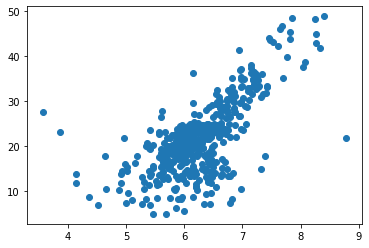

In [7]:
# 绘图
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [3]:
# 拆分数据为训练集、测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=666)

# 调用自己实现的简单线性回归
from Machine_Learning.LinearReg.SimpleLinearRegression import SimpleLinearRegression2
reg = SimpleLinearRegression2()
reg.fit(x_train,y_train)
y_predict = reg.predict(x_test)

In [4]:
from Machine_Learning.LinearReg.metrics import mean_squared_error
from Machine_Learning.LinearReg.metrics import root_mean_squared_error
from Machine_Learning.LinearReg.metrics import mean_absolute_error
import numpy as np
# 计算R squared
R_squared = 1 - mean_squared_error(y_test, y_predict) / np.var(y_test)
R_squared

0.5682464825049472

In [5]:
# 在自己的代码中实现后
from Machine_Learning.LinearReg.metrics import r2_score
r2_score(y_test, y_predict)

0.5682464825049472

In [6]:
# 调用sklearn中包实现
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.5682464825049474

## 其中，也可调用在sklearn中的简单线性回归算法，不用自己实现的简单线性回归算法